In [ ]:
from google.colab import files
import pandas as pd

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]

Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [ ]:
#importing the necesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency


In [ ]:
!pip install pandas

In [ ]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#1. DATA CLEANING

In [ ]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


**this is a clean dataset**

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

In [ ]:
#Define the cateorical columns and the numerical columns
categorical_columns = ['education', 'self_employed', 'loan_status']
numerical_columns = ['loan_amount', 'loan_term', 'income_annum', 'cibil_score','bank_asset_value', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'no_of_dependents','loan_id']

In [ ]:
#Remove the white spaces in the column names for the new df after the loan id is dropped
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

**Converting values in a column to absolute values**

In [ ]:
df['residential_assets_value'] = abs(df['residential_assets_value'])
(df['residential_assets_value'] < 0).sum()

0

In [ ]:
#removing white spaces in the column names and values
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

**Adding new column for the CIBIL rating**


In [ ]:
#Adding new column for the CIBIL rating
def cibil_rating(value):
    if 300 <= value <= 549:
        return "Poor"
    elif 550 <= value <= 649:
        return "Average"
    elif 650 <= value <= 749:
        return "Good"
    elif 750 <= value <= 900:
        return "Excellent"
    else:
        return 'Error'

df['cibil_rating'] = df['cibil_score'].apply(cibil_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


**Adding new column for Income level**

In [ ]:
def income_level(value):
    if 100000 <= value <= 1000000:
        return "Low"
    elif 1000001 <= value <= 4000000:
        return "Low Middle"
    elif 4000001 <= value <= 7500000:
        return "High Middle"
    elif 7500001 <= value <= 10000000:
        return "High"
    else:
        return 'Very High'

df['income_level'] = df['income_annum'].apply(income_level)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,High Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


**Adding loan rating column**

In [ ]:
def loan_rating(value):
    if 100000 <= value <= 10000000:
        return "Bronze"
    elif 10000001 <= value <= 20000000:
        return "Silver"
    elif 20000001 <= value <= 30000000:
        return "Gold"
    elif 30000001 <= value <= 40000000:
        return "Platinum"
    else:
        return 'Unknown'

df['loan_rating'] = df['loan_amount'].apply(loan_rating)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,High Middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


**Adding new column for loan term range**

In [ ]:
def loan_term(value):
    if 0 <= value <= 7:
        return "Short-term"
    elif 8 <= value <= 14:
        return "Intermediate"
    elif 15 <= value <= 20:
        return "Long-term"
    else:
        return 'Error'

df['loan_term_type'] = df['loan_term'].apply(loan_term)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,High Middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-term


**Adding column of dependent class**

In [ ]:
def dependent_class(value):
    if 0 <= value <= 1:
        return "Low"
    elif 2 <= value <= 3:
        return "Moderate"
    elif 4 <= value <= 5:
        return "High"
    else:
        return 'Error'

df['dependent_class'] = df['no_of_dependents'].apply(dependent_class)
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_class
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,High Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-term,High


#2.EXPLANATRY DATA ANALYSIS

Customer Segmentation

In [ ]:
income = df['income_level'].value_counts().reset_index()

income.head()

,income_level,count
0,High Middle,1548
1,Low Middle,1284
2,High,1047
3,Low,390


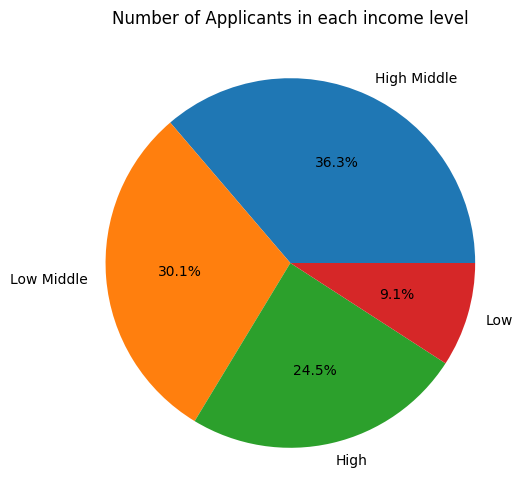

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(income['count'] , labels=income['income_level'] , autopct='%1.1f%%')
plt.title("Number of Applicants in each income level")
plt.show()

In [ ]:
dependent = df['dependent_class'].value_counts().reset_index()

dependent.head()

,dependent_class,count
0,Moderate,1435
1,High,1425
2,Low,1409


**Education**

In [ ]:
education = df['education'].value_counts().reset_index()

education.head()

,education,count
0,Graduate,2144
1,Not Graduate,2125


**Employement**

In [ ]:
employment = df['self_employed'].value_counts().reset_index()

employment.head()

,self_employed,count
0,Yes,2150
1,No,2119


**Loan Approval**

In [ ]:
loans = df['loan_status'].value_counts().reset_index()

loans.head()

,loan_status,count
0,Approved,2656
1,Rejected,1613


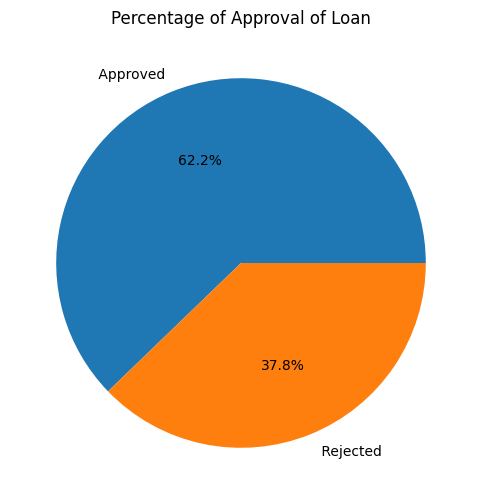

In [ ]:
# plotting the loan data

plt.figure(figsize=(8,6))
plt.pie(loans['count'] , labels=loans['loan_status'] , autopct='%1.1f%%')
plt.title("Percentage of Approval of Loan")
plt.show()

**Distribution analysis**

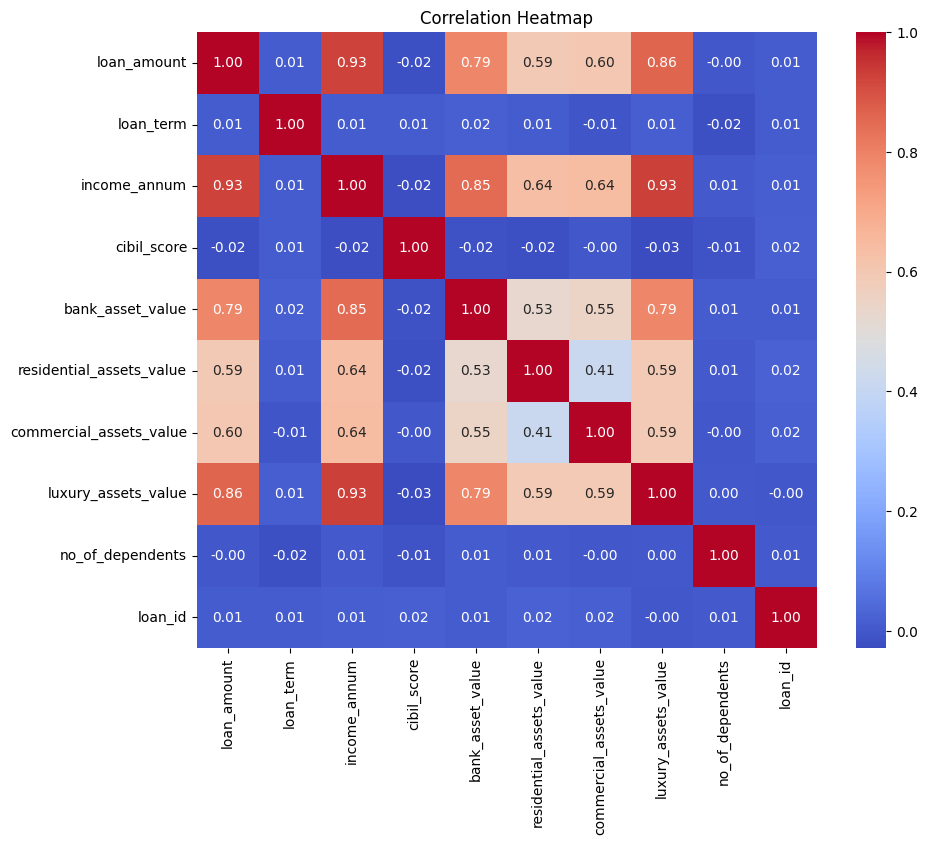

In [ ]:
#correlation of the numerical features
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**This shows that the higher the income, the higher the loan amount**


**Asset value impact/influence on loan approval/rejection**

In [ ]:
# splitting the data into two groups based on loan_status

approved  = df[df['loan_status'] == 'Approved']
rejected  = df[df['loan_status'] == 'Rejected']

assets = ['residential_assets_value' , 'commercial_assets_value' , 'luxury_assets_value' , 'bank_asset_value']


# performing a t-test

for columns in assets:
    t_stat, p_value = ttest_ind(approved[columns], rejected[columns] , equal_var=False)
    print(f'T-Test for {columns}')
    print(f'T-Statistics : {t_stat}')
    print(f'P value : {p_value}')
    if p_value < 0.05:
        print(f'Reject Null Hypothesis, Because The difference in {columns} between Approved and Rejected Loans is Statistically Significant')
        print('-----------------------------------------------')

    else:
        print(f'Failed to reject Null Hypothesis, Because The difference in {columns} between Approved and Rejected Loans is not Statistically Significant')
        print('-----------------------------------------------')

T-Test for residential_assets_value
T-Statistics : nan
P value : nan
Failed to reject Null Hypothesis, Because The difference in residential_assets_value between Approved and Rejected Loans is not Statistically Significant
-----------------------------------------------
T-Test for commercial_assets_value
T-Statistics : nan
P value : nan
Failed to reject Null Hypothesis, Because The difference in commercial_assets_value between Approved and Rejected Loans is not Statistically Significant
-----------------------------------------------
T-Test for luxury_assets_value
T-Statistics : nan
P value : nan
Failed to reject Null Hypothesis, Because The difference in luxury_assets_value between Approved and Rejected Loans is not Statistically Significant
-----------------------------------------------
T-Test for bank_asset_value
T-Statistics : nan
P value : nan
Failed to reject Null Hypothesis, Because The difference in bank_asset_value between Approved and Rejected Loans is not Statistically Sign

**Using ANOVA to determine the relation between income and asset value¶**

In [ ]:
# Extracting columns values

residential_asset = df['residential_assets_value']
commercial_asset  = df['commercial_assets_value']
luxury_asset = df['luxury_assets_value']
bank_asset = df['bank_asset_value']
income = df['income_annum']


# Performing Anova

t_stat , p = f_oneway(residential_asset, commercial_asset, luxury_asset , bank_asset , income)

print(f'T-Statistics : {t_stat}')
print(f'P Value : {p}')

if p < 0.05:
    print('There is a relation between Assets and Income')
else:
    print('There is no relation between Assets and Income')

T-Statistics : 2518.654468935116
P Value : 0.0
There is a relation between Assets and Income


**Correlation between income and loan amount¶**


In [ ]:
income  = df['income_annum']
loan = df['loan_amount']

# performing a t-test

t_stat, p_value = ttest_ind(income, loan , equal_var=False)
print(f'T-Statistics : {t_stat}')
print(f'P value : {p_value}')
if p_value < 0.05:
    print('Reject Null Hypothesis, Because there is significant difference between loan and Income annum')
else:
    print('Failed to reject Null Hypothesis, Because there is no significant difference between loan and Income annum')

T-Statistics : -69.51489699866843
P value : 0.0
Reject Null Hypothesis, Because there is significant difference between loan and Income annum


#LOGISTIC REGRESSION

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_class
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,High Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-term,High


In [ ]:
# Functions to transform columns
def education_status(col):
    if col == "Graduate":
        return 1
    elif col == "Not Graduate":
        return 0
    else:
        return 'Unknown'

def employ_status(col):
    if col == "Yes":
        return 1
    elif col == "No":
        return 0

def loan_status(col):
    if col == "Approved":
        return 1
    elif col == "Rejected":
        return 0

# Applying the functions
df['edu_status'] = df['education'].apply(education_status)
df['emp_status'] = df['self_employed'].apply(employ_status)
df['loan_approval'] = df['loan_status'].apply(loan_status)

# Display the updated DataFrame
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,cibil_rating,income_level,loan_rating,loan_term_type,dependent_class,edu_status,emp_status,loan_approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,Unknown,None,None
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Poor,High Middle,Silver,Intermediate,Low,Unknown,None,None
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Poor,High,Gold,Long-term,Moderate,Unknown,None,None
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,Unknown,None,None
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Poor,High,Gold,Long-term,High,Unknown,None,None


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_auc_score , precision_recall_curve , roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV

In [ ]:
print(df['loan_approval'].value_counts())


loan_approval
-1    4269
Name: count, dtype: int64


In [ ]:
df = df[df['loan_approval'] != -1]


In [ ]:
X = df.drop(columns=['loan_id' , 'loan_status' ,'cibil_rating' , 'income_level' , 'loan_rating' , 'loan_term_type' , 'dependent_class' , 'loan_approval' , 'education' , 'self_employed'])


y = df['loan_approval']

In [ ]:
X = df.drop(columns=['loan_id', 'loan_status', 'cibil_rating', 'income_level', 'loan_rating', 'loan_term_type', 'dependent_class', 'loan_approval', 'education', 'self_employed'])
y = df['loan_approval']

# Ensure there are enough samples for splitting
if df.shape[0] > 0:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Training the model
    log = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

    # Predicting
    predictions = log.predict(X_test_scaled)

    # Accuracy
    print("Training Accuracy:", log.score(X_train_scaled, y_train))
    print("Test Accuracy:", log.score(X_test_scaled, y_test))
else:
    print("No valid samples available for training and testing.")



No valid samples available for training and testing.
